# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [163]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split

Let's generate our dataset and take a look on it.

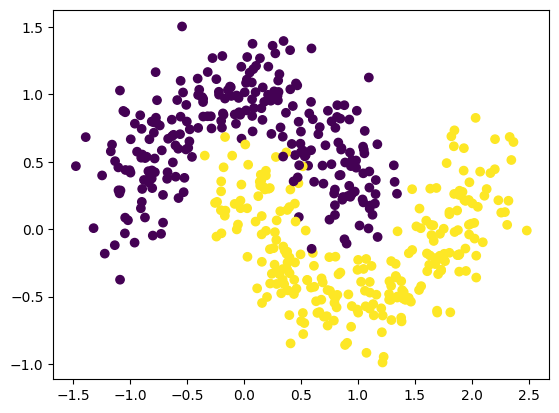

In [155]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

0.856
0.858


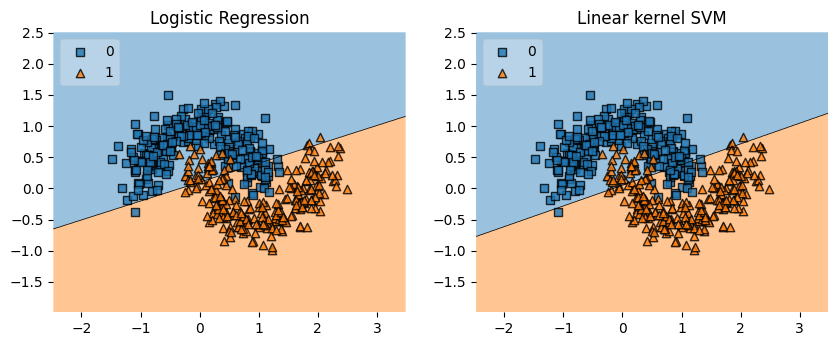

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')


lr = LogisticRegression(random_state=0) # add some params
svm = SVC(kernel='linear',random_state=0, probability=True) # here too

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Linear kernel SVM']

for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    print(clf.fit(moons_points, moons_labels).score(moons_points, moons_labels))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X= moons_points, y= moons_labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


Выводы:

Хотя метрика дает значения 0.86 для обоих способов, графическое изображение показывает, что линейная классификация не подходит для данной задачи

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Score Polynomial 0.974
Score RBF 0.974
Score Sigmoid 0.648


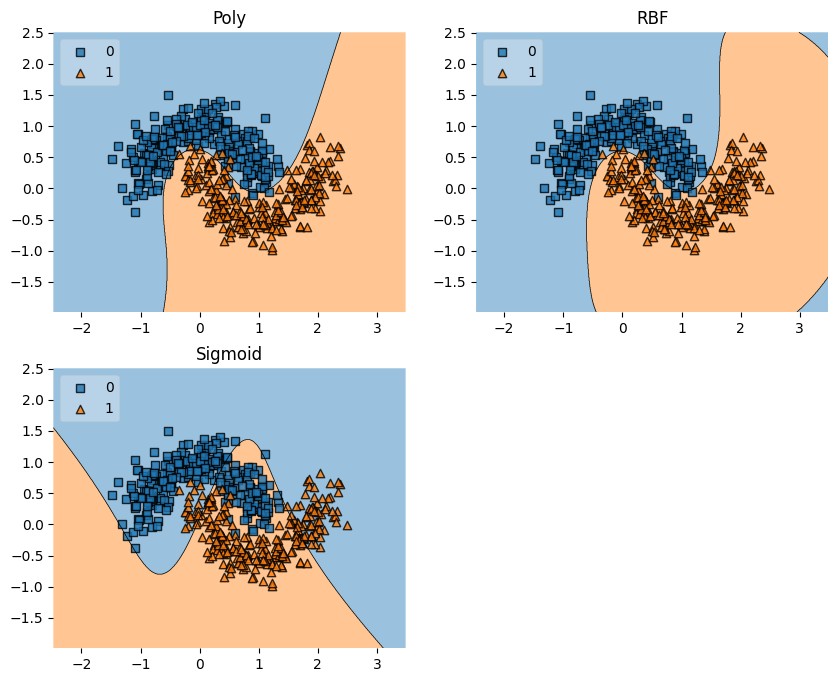

In [157]:
### YOUR CODE HERE

svm_poly = SVC(kernel='poly',random_state=0, degree=3, coef0=0.5)
svm_rbf = SVC(kernel='rbf',random_state=0)
svm_sigmoid = SVC(kernel='sigmoid')


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

print('Score Polynomial {}'.\
      format(svm_poly.fit(moons_points, moons_labels).\
            score(moons_points, moons_labels)))
print('Score RBF {}'.\
      format(svm_rbf.fit(moons_points, moons_labels).\
             score(moons_points, moons_labels)))
print('Score Sigmoid {}'.\
      format(svm_sigmoid.fit(moons_points, moons_labels).\
             score(moons_points, moons_labels)))

labels = ['Poly',
          'RBF',
          'Sigmoid']

for clf, lab, grd in zip([svm_poly, svm_rbf, svm_sigmoid],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


Выводы:

1. По метрикам и по графикам мы видим что полиномиальное ядро ('poly') и ядро RBF ('rbf') провели довольно точное разделение этой выборки. Сигмоидальное ядро с задачей не справилось.
2. Формы границ полиномиального ядра и ядра RBF стали соответствовать границе между классами. Сигмоидальное ядро не смогло определить границу.
3. Я выбрал степень 3. При степени 2 классификации  практически не возникает. При степенх выше 3 метрика возрастает незначительно, но при этом повышаются вычислительные затраты и возможен эффект переобучения. Поэтому степень 3 достаточна.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Score Polynomial 0.968


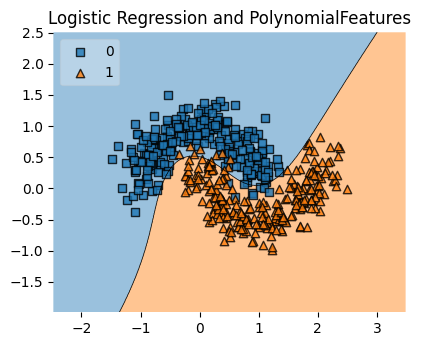

In [158]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree = 3),LogisticRegression(random_state=0))

print('Score Polynomial {}'.\
      format(pipe.fit(moons_points, moons_labels).score(moons_points, moons_labels)))

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
labels = ['Logistic Regression and PolynomialFeatures']

for clf, lab, grd in zip([pipe], labels,itertools.product([0, 1],repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


Выводы:

1. При предварительной обработке с получением новых фичей из различных мономов степени не выше заданной  логистическая регрессия показывает результат не хуже метода опорных векторов с подходящими ядрами. Это видно и по метрикам и по графику.
2. Степень при обработке выбрана - 3. Она дает сравнимый результат, а более высокие степени несущественно улучшают результат но существенно повышают вычислительную сложность. Степень такая же как и с полиномиальным ядром в методе опорных векторов, тк разделяющая граница досточно точн описывается полиномом 3й степени.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

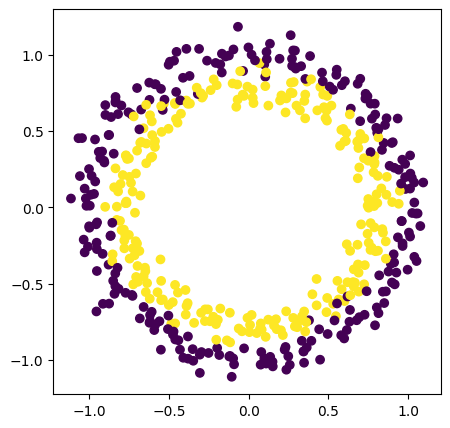

In [159]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

(numpy.ndarray, numpy.ndarray)

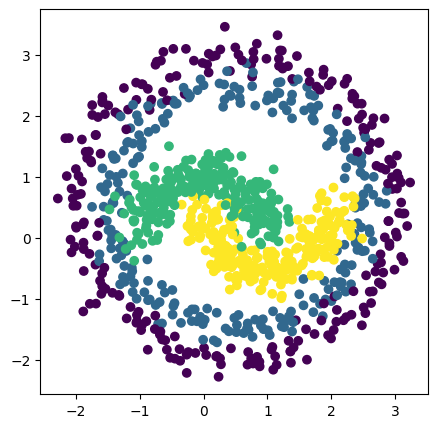

In [160]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

type(labels), type(points)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Score Polynomial 0.918
Score RBF 0.921


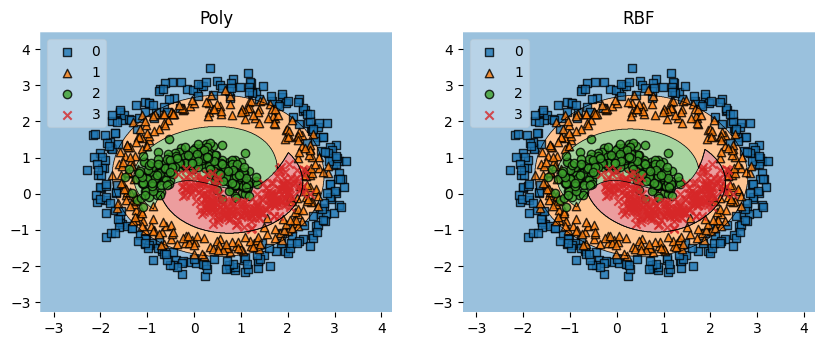

In [161]:
### YOUR CODE HERE

svm_poly = SVC(kernel='poly',random_state=0, degree=3, coef0=0.5)
# svm_rbf = SVC(kernel='poly',random_state=0, degree=3, coef0=0.5)
svm_rbf = SVC(kernel='rbf',random_state=0)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

print('Score Polynomial {}'.\
      format(svm_poly.fit(points, labels).\
            score(points, labels)))
print('Score RBF {}'.\
      format(svm_rbf.fit(points, labels).\
            score(points, labels)))

for clf, lab, grd in zip([svm_poly, svm_rbf],
                         ['Poly','RBF'],
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


Score Polynomial 0.942


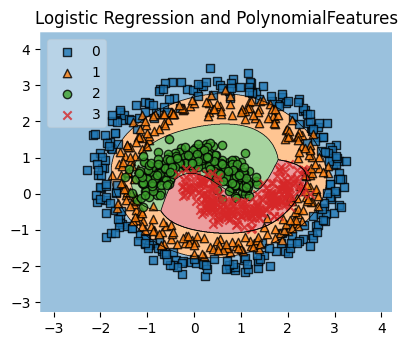

In [162]:
pipe = make_pipeline(PolynomialFeatures(degree = 4),LogisticRegression(random_state=0))

print('Score Polynomial {}'.\
      format(pipe.fit(points, labels).\
             score(points, labels)))

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([pipe], \
                         ['Logistic Regression and PolynomialFeatures'],\
                            itertools.product([0, 1],repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

Выводы:

1. На более сложной задаче из 4х классов метод опорных векторов с полиномиальным ядром (степень 3) и ядром RBF показали пркатически одинаковые результаты и по метрике и графически.
2. Метод логистической решгрессии после предварительрной пониномиальной обработки (сепень 3) показал даже чуть лучшие результаты.
3. Однако по времени вычислений метод опорных векторов с полиномильным ядром занял 2.7 сек, с RBF ядром занял 12 секунд, а вот логистическая регрессия заняла всего 0.4 секунды. 